In [223]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm

In [239]:
# import data 
data = pd.read_csv('youtubefighterdata_20172021.csv')
data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,likes_R_fighter,dislikes_R_fighter,commentCounts_R_fighter,favoriteCounts_R_fighter,name_B_fighter,views_B_fighter,likes_B_fighter,dislikes_B_fighter,commentCounts_B_fighter,favoriteCounts_B_fighter
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.0,...,2281.0,195.0,463.0,0.0,Gustavo Lopez,470547.0,26606.0,556.0,3214.0,0.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.0,...,4367.0,421.0,993.0,0.0,Roman Dolidze,1323650.0,12765.0,476.0,1266.0,0.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,31263.0,2120.0,6669.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,27736.0,3034.0,4097.0,0.0,Montserrat Conejo,801950.0,6992.0,718.0,1912.0,0.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.0,...,2568.0,213.0,654.0,0.0,Macy Chiasson,234280.0,3145.0,283.0,864.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Yair Rodriguez,BJ Penn,John McCarthy,2017-01-15,"Phoenix, Arizona, USA",Red,False,Featherweight,0.032227,0.0,...,112252.0,7962.0,23001.0,0.0,BJ Penn,18916424.0,104080.0,7643.0,23494.0,0.0
2015,Bojan Mihajlovic,Joachim Christensen,Nic Jones,2017-01-15,"Phoenix, Arizona, USA",Blue,False,LightHeavyweight,1.000000,0.0,...,3731.0,633.0,932.0,0.0,Joachim Christensen,1516189.0,13145.0,620.0,2463.0,0.0
2016,Walt Harris,Chase Sherman,Al Guinee,2017-01-15,"Phoenix, Arizona, USA",Red,False,Heavyweight,0.000000,0.0,...,55627.0,1878.0,9698.0,0.0,Chase Sherman,1112229.0,10134.0,935.0,1232.0,0.0
2017,Dmitrii Smoliakov,Cyril Asker,Al Guinee,2017-01-15,"Phoenix, Arizona, USA",Blue,False,Heavyweight,0.000000,1.0,...,20990.0,3702.0,5609.0,0.0,Cyril Asker,1003739.0,13661.0,756.0,1983.0,0.0


In [240]:
# convert date column to datetime object
data['date'] = pd.to_datetime(data['date'])

In [241]:
# get list of time since last match for R_fighter and B_fighter (R_last_match, B_last_match)
R_last_match = []
B_last_match = []
# for each fight, find the date of R_fighter's last fight and B_fighter's last fight
for i in range(len(data)):
    R_fighter = data.iloc[i]['R_fighter']
    B_fighter = data.iloc[i]['B_fighter']
    fight_date = data.iloc[i]['date']
    R_last_date = None
    B_last_date = None
    # Get dataframes of each fighter 
    R_fights = data.iloc[i+1:, :].loc[(data['R_fighter'] == R_fighter) | (data['B_fighter'] == R_fighter)]
    B_fights = data.iloc[i+1:, :].loc[(data['R_fighter'] == B_fighter) | (data['B_fighter'] == B_fighter)]
    # get first row that date != current date
    for _, R_fight in R_fights.iterrows():
        if R_fight['date'] != fight_date:
            R_last_date = R_fight['date']
            break
    for _, B_fight in B_fights.iterrows():
        if B_fight['date'] != fight_date:
            B_last_date = B_fight['date']
            break
    # if no previous fight found, set last fight date as current fight date 
    if R_last_date is None:
        R_last_date = fight_date
    if B_last_date is None:
        B_last_date = fight_date
    # append difference of two dates to respective list
    R_last_match.append(fight_date - R_last_date)
    B_last_match.append(fight_date - B_last_date)



In [242]:
# convert time last fought lists to categories 
# 0: 0-90 days 
# 1: 90-180 days 
# 2: 180-270 days 
# 3: 270-360 days
# 4: more than 360 days
# 5: never fought 
def time_last_fought_category(time_last_fought):
    categorized = []
    for x in time_last_fought:
        if x < datetime.timedelta(days = 1):
            categorized.append(5)
        elif x < datetime.timedelta(days=90):
            categorized.append(0)
        elif x < datetime.timedelta(days = 180):
            categorized.append(1)
        elif x < datetime.timedelta(days = 270):
            categorized.append(2)
        elif x < datetime.timedelta(days =360):
            categorized.append(3)
        else:
            categorized.append(4)
    return categorized 

In [243]:
# add last_match categories to data
R_last_match = time_last_fought_category(R_last_match)
B_last_match = time_last_fought_category(B_last_match)
data['R_last_match'] = R_last_match
data['B_last_match'] = B_last_match

In [244]:
# add column called winrate
data['B_winrate'] = data['B_wins'] / (data['B_wins'] + data['B_losses'] + data['B_draw'])
data['R_winrate'] = data['R_wins'] / (data['R_wins'] + data['R_losses'] + data['R_draw'])

In [245]:
data = data[data['Winner'] != 'Draw']  
data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,name_B_fighter,views_B_fighter,likes_B_fighter,dislikes_B_fighter,commentCounts_B_fighter,favoriteCounts_B_fighter,R_last_match,B_last_match,B_winrate,R_winrate
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.0,...,Gustavo Lopez,470547.0,26606.0,556.0,3214.0,0.0,1,1,0.500000,1.000000
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.0,...,Roman Dolidze,1323650.0,12765.0,476.0,1266.0,0.0,1,1,1.000000,0.666667
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,5,NaN,0.571429
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,Montserrat Conejo,801950.0,6992.0,718.0,1912.0,0.0,5,5,NaN,NaN
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.0,...,Macy Chiasson,234280.0,3145.0,283.0,864.0,0.0,3,4,0.800000,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Yair Rodriguez,BJ Penn,John McCarthy,2017-01-15,"Phoenix, Arizona, USA",Red,False,Featherweight,0.032227,0.0,...,BJ Penn,18916424.0,104080.0,7643.0,23494.0,0.0,5,5,0.521739,1.000000
2015,Bojan Mihajlovic,Joachim Christensen,Nic Jones,2017-01-15,"Phoenix, Arizona, USA",Blue,False,LightHeavyweight,1.000000,0.0,...,Joachim Christensen,1516189.0,13145.0,620.0,2463.0,0.0,5,5,0.000000,0.000000
2016,Walt Harris,Chase Sherman,Al Guinee,2017-01-15,"Phoenix, Arizona, USA",Red,False,Heavyweight,0.000000,0.0,...,Chase Sherman,1112229.0,10134.0,935.0,1232.0,0.0,5,5,0.000000,0.200000
2017,Dmitrii Smoliakov,Cyril Asker,Al Guinee,2017-01-15,"Phoenix, Arizona, USA",Blue,False,Heavyweight,0.000000,1.0,...,Cyril Asker,1003739.0,13661.0,756.0,1983.0,0.0,5,5,0.000000,0.000000


In [246]:
# add new column to data that is 1 if red wins and 0 if blue wins 
data['red_Won'] = data['Winner'] == 'Red'
data['red_Won'] = data['red_Won'].astype(int)

<ipython-input-246-cd437e08512a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_Won'] = data['Winner'] == 'Red'
<ipython-input-246-cd437e08512a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red_Won'] = data['red_Won'].astype(int)


In [247]:
# check for null values
data.isna().sum()

R_fighter         0
B_fighter         0
Referee          16
date              0
location          0
               ... 
R_last_match      0
B_last_match      0
B_winrate       359
R_winrate       155
red_Won           0
Length: 164, dtype: int64

In [248]:

# because youtube data was pulled using the youtube API, we can assume NA means 0
data['views_R_fighter'] = data['views_R_fighter'].fillna(0)
data['views_B_fighter'] = data['views_B_fighter'].fillna(0)
data['likes_R_fighter'] = data['likes_R_fighter'].fillna(0)
data['likes_B_fighter'] = data['likes_B_fighter'].fillna(0)
data['dislikes_R_fighter'] = data['dislikes_R_fighter'].fillna(0)
data['dislikes_B_fighter'] = data['dislikes_B_fighter'].fillna(0)
data['commentCounts_R_fighter'] = data['commentCounts_R_fighter'].fillna(0)
data['commentCounts_B_fighter'] = data['commentCounts_B_fighter'].fillna(0)

data.isna().sum()

<ipython-input-248-6c23de7753c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['views_R_fighter'] = data['views_R_fighter'].fillna(0)
<ipython-input-248-6c23de7753c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['views_B_fighter'] = data['views_B_fighter'].fillna(0)
<ipython-input-248-6c23de7753c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

R_fighter         0
B_fighter         0
Referee          16
date              0
location          0
               ... 
R_last_match      0
B_last_match      0
B_winrate       359
R_winrate       155
red_Won           0
Length: 164, dtype: int64

In [249]:
# add likes rate 
data['R_likesRate'] = data['likes_R_fighter']/(data['likes_R_fighter'] + data['dislikes_R_fighter'])
data['B_likesRate'] = data['likes_B_fighter']/(data['likes_B_fighter'] + data['dislikes_B_fighter'])

<ipython-input-249-9bfeacfb06c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['R_likesRate'] = data['likes_R_fighter']/(data['likes_R_fighter'] + data['dislikes_R_fighter'])
<ipython-input-249-9bfeacfb06c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['B_likesRate'] = data['likes_B_fighter']/(data['likes_B_fighter'] + data['dislikes_B_fighter'])


In [250]:
data['R_likesRate'] = data['R_likesRate'].fillna(0)
data['B_likesRate'] = data['B_likesRate'].fillna(0)

<ipython-input-250-2d8b46ad6460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['R_likesRate'] = data['R_likesRate'].fillna(0)
<ipython-input-250-2d8b46ad6460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['B_likesRate'] = data['B_likesRate'].fillna(0)


(array([134.,   4.,  26.,  93.,  90., 481., 353., 239., 127., 276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

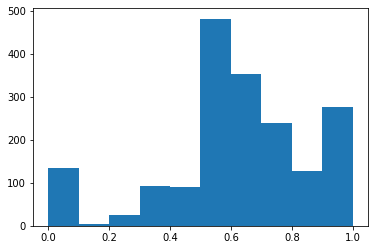

In [251]:
# look at winrate distribution, no nan values
import math
x = []
for y in data['R_winrate']:
    if not math.isnan(y):
        x.append(y)
plt.hist(x)

In [252]:
# change stats into categories
# split into 6 different groups:
# 0: 0-19th percentile
# 1: 20-39th percentile
# 2: 40-59th percentile
# 3: 60-79th percentile
# 4: 80-100th percentile
# 5: no stats
def categorize_stats(stats):
    stats_nonan = stats[~np.isnan(stats)]
    zero = np.percentile(stats_nonan, 19)
    one = np.percentile(stats_nonan, 39)
    two = np.percentile(stats_nonan, 59)
    three = np.percentile(stats_nonan, 79)
    four = np.percentile(stats_nonan, 100)
    categorized = []
    for x in stats:
        if x <= zero:
            categorized.append(0)
        elif x <= one:
            categorized.append(1)
        elif x <= two:
            categorized.append(2)
        elif x <= three:
            categorized.append(3)
        elif x <= four:
            categorized.append(4)
        else:
            categorized.append(5)
    return categorized




In [267]:
# categorize chosen stats columns; these are columns that can only be filled if it is not a players first game
to_categorize = ['B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'R_avg_KD',
 'R_avg_opp_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_avg_opp_TD_pct',
 'R_avg_SUB_ATT',
 'R_avg_opp_SUB_ATT', 
 'R_winrate',
 'B_winrate']


# categorize chosen columns
for col in to_categorize:
     data[col] = categorize_stats(data[col])




<ipython-input-267-0569ddf757e5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = categorize_stats(data[col])


In [268]:
data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,dislikes_B_fighter,commentCounts_B_fighter,favoriteCounts_B_fighter,R_last_match,B_last_match,B_winrate,R_winrate,red_Won,R_likesRate,B_likesRate
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0,0,...,556.0,3214.0,0.0,1,1,1,4,1,0.921244,0.979530
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,3,0,...,476.0,1266.0,0.0,1,1,4,2,1,0.912072,0.964051
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,5,5,...,0.0,0.0,NaN,1,5,5,1,1,0.936495,0.000000
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,5,5,...,718.0,1912.0,0.0,5,5,5,5,0,0.901397,0.906874
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,2,0,...,283.0,864.0,0.0,3,4,3,0,0,0.923409,0.917445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Yair Rodriguez,BJ Penn,John McCarthy,2017-01-15,"Phoenix, Arizona, USA",Red,False,Featherweight,2,0,...,7643.0,23494.0,0.0,5,5,2,4,1,0.933768,0.931590
2015,Bojan Mihajlovic,Joachim Christensen,Nic Jones,2017-01-15,"Phoenix, Arizona, USA",Blue,False,LightHeavyweight,4,0,...,620.0,2463.0,0.0,5,5,0,0,0,0.854950,0.954958
2016,Walt Harris,Chase Sherman,Al Guinee,2017-01-15,"Phoenix, Arizona, USA",Red,False,Heavyweight,0,0,...,935.0,1232.0,0.0,5,5,0,0,1,0.967342,0.915530
2017,Dmitrii Smoliakov,Cyril Asker,Al Guinee,2017-01-15,"Phoenix, Arizona, USA",Blue,False,Heavyweight,0,4,...,756.0,1983.0,0.0,5,5,0,0,0,0.850073,0.947562


In [269]:
# check for null values
list(data.isna().sum())

[0,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 359,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 22,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 143,
 0,
 0,
 0,
 0,
 143,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [270]:
# drop uneeded cols
data = data[['Referee', 'location', 'weight_class', 'R_last_match', 'B_last_match', 'B_Stance', 'R_Stance', 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'R_avg_KD',
 'R_avg_opp_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_avg_opp_TD_pct',
 'R_avg_SUB_ATT',
 'R_avg_opp_SUB_ATT', 
 'R_winrate',
 'B_winrate',
 'R_total_title_bouts',
 'R_current_win_streak',
 'R_current_lose_streak',
 'R_longest_win_streak',
 'B_total_title_bouts',
 'B_current_win_streak',
 'B_current_lose_streak',
 'B_longest_win_streak', 'red_Won', 'title_bout','views_R_fighter',
 'R_likesRate',
 'B_likesRate',
 'commentCounts_R_fighter',
 'views_B_fighter',
 'commentCounts_B_fighter']]

In [271]:
data.isna().sum()

Referee                    16
location                    0
weight_class                0
R_last_match                0
B_last_match                0
B_Stance                    4
R_Stance                    7
B_avg_KD                    0
B_avg_opp_KD                0
B_avg_SIG_STR_pct           0
B_avg_opp_SIG_STR_pct       0
B_avg_TD_pct                0
B_avg_opp_TD_pct            0
B_avg_SUB_ATT               0
B_avg_opp_SUB_ATT           0
R_avg_KD                    0
R_avg_opp_KD                0
R_avg_SIG_STR_pct           0
R_avg_opp_SIG_STR_pct       0
R_avg_TD_pct                0
R_avg_opp_TD_pct            0
R_avg_SUB_ATT               0
R_avg_opp_SUB_ATT           0
R_winrate                   0
B_winrate                   0
R_total_title_bouts         0
R_current_win_streak        0
R_current_lose_streak       0
R_longest_win_streak        0
B_total_title_bouts         0
B_current_win_streak        0
B_current_lose_streak       0
B_longest_win_streak        0
red_Won   

In [272]:
# drop empty rows
data = data.dropna()

In [273]:
# change title_bout to be binary
data['title_bout'] = data['title_bout'].astype(int)

In [274]:
# check data dtypes 
for x in range(len(data.dtypes)):
    if data.dtypes[x] == 'O':
        print(data.columns[x])

Referee
location
weight_class
B_Stance
R_Stance


In [275]:
# split data into testing (for final model evaluation) and training
from sklearn.model_selection import train_test_split

data_X = data.drop(['red_Won'], axis = 1)
data_y = data['red_Won']
data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(data_X, data_y, test_size=0.3, random_state=88)

In [278]:
# begin feature engineering 

from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

# selects columns based on VIF and returns 
# n: cutoff for VIF
# df: dataframe
# returns: modified dataframe after performing VIF reduction
def vif_selection(n, df):
    cols = df.columns
    vifs = VIF(df, cols)
    largest_vif = max(vifs)
    largest_index = vifs[vifs == largest_vif].index[0]
    if largest_vif < n: 
        return df
    else:
        df = df.drop([largest_index], axis = 1)
        return vif_selection(n, df)

In [279]:
# chi square reduction
from scipy.stats import chi2_contingency

def chi_square_reduction(df, col):
    if chi2_contingency(pd.crosstab(df['red_Won'], df[col]))[1] > 0.05:
        return False
    else:
        return True


In [280]:
# feature engineering method 1

# encode all categorical data 
data_1 = pd.get_dummies(data_train_X, columns = ['Referee', 'location', 'weight_class', 'R_last_match', 'B_last_match', 'B_Stance', 'R_Stance', 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'R_avg_KD',
 'R_avg_opp_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_avg_opp_TD_pct',
 'R_avg_SUB_ATT',
 'R_avg_opp_SUB_ATT', 
 'R_winrate',
 'B_winrate',
 'R_total_title_bouts',
 'R_current_win_streak',
 'R_current_lose_streak',
 'R_longest_win_streak',
 'B_total_title_bouts',
 'B_current_win_streak',
 'B_current_lose_streak',
 'B_longest_win_streak'])

In [281]:
# removes columns that have the same values as winrate columns
def remove_duplicate_cols(df):
    b_new = list(df['B_winrate_5'])
    r_new = list(df['R_winrate_5'])
    cols = list(df.columns)
    for c in cols:
        if c == 'B_winrate_5':
            continue
        elif c == 'R_winrate_5':
            continue
        else:
            if list(df[c]) == b_new:
                df = df.drop(c, axis = 1)
            elif list(df[c]) == r_new:
                df = df.drop(c, axis = 1)
    return df


In [282]:
# get rid of duplicate cols, mainly cols that indicate a fighter is new 
data_1 = remove_duplicate_cols(data_1)

# split data_1 into validation and training
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(data_1, data_train_y, test_size=0.3, random_state=88)
# run VIF with limit of 3
#X_1_train = vif_selection(3, X_1_train)

In [283]:
# feature engineering method 2

# encode all categorical except for referee and location
data_2 = pd.get_dummies(data_train_X, columns = ['weight_class', 'R_last_match', 'B_last_match', 'B_Stance', 'R_Stance', 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'R_avg_KD',
 'R_avg_opp_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_avg_opp_TD_pct',
 'R_avg_SUB_ATT',
 'R_avg_opp_SUB_ATT', 
 'R_winrate',
 'B_winrate',
 'R_total_title_bouts',
 'R_current_win_streak',
 'R_current_lose_streak',
 'R_longest_win_streak',
 'B_total_title_bouts',
 'B_current_win_streak',
 'B_current_lose_streak',
 'B_longest_win_streak'])

# drop referee and location
data_2 = data_2.drop(['Referee', 'location'], axis = 1)

# get rid of duplicate cols
data_2 = remove_duplicate_cols(data_2)

# split data_2 into validation and training
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(data_2, data_train_y, test_size=0.3, random_state=88)


In [338]:
# feature engineering method 3


data_3 = pd.get_dummies(data_train_X, columns=['B_avg_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_TD_pct',
 'R_avg_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_winrate',
 'B_winrate'])

data_3 = data_3.drop(['Referee', 'location', 'weight_class', 'B_Stance', 'R_Stance',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_opp_TD_pct',
 'R_avg_SUB_ATT',
 'R_avg_opp_SUB_ATT',
 'R_total_title_bouts',
 'R_current_win_streak',
 'R_current_lose_streak',
 'R_longest_win_streak',
 'B_total_title_bouts',
 'B_current_win_streak',
 'B_current_lose_streak',
 'B_longest_win_streak',
 'commentCounts_R_fighter', 
 'commentCounts_B_fighter', 
 'R_last_match', 
 'B_last_match', 
 'B_avg_opp_KD',
 'R_avg_opp_KD',
 'title_bout'], axis = 1)

data_3 = remove_duplicate_cols(data_3)

# split data_3 into validation and training
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(data_3, data_train_y, test_size=0.3)


In [285]:
list(X_3_train.columns)

['views_R_fighter',
 'R_likesRate',
 'B_likesRate',
 'views_B_fighter',
 'B_avg_KD_0',
 'B_avg_KD_2',
 'B_avg_KD_3',
 'B_avg_KD_4',
 'B_avg_SIG_STR_pct_0',
 'B_avg_SIG_STR_pct_1',
 'B_avg_SIG_STR_pct_2',
 'B_avg_SIG_STR_pct_3',
 'B_avg_SIG_STR_pct_4',
 'B_avg_TD_pct_0',
 'B_avg_TD_pct_1',
 'B_avg_TD_pct_2',
 'B_avg_TD_pct_3',
 'B_avg_TD_pct_4',
 'R_avg_KD_0',
 'R_avg_KD_1',
 'R_avg_KD_2',
 'R_avg_KD_3',
 'R_avg_KD_4',
 'R_avg_SIG_STR_pct_0',
 'R_avg_SIG_STR_pct_1',
 'R_avg_SIG_STR_pct_2',
 'R_avg_SIG_STR_pct_3',
 'R_avg_SIG_STR_pct_4',
 'R_avg_TD_pct_0',
 'R_avg_TD_pct_1',
 'R_avg_TD_pct_2',
 'R_avg_TD_pct_3',
 'R_avg_TD_pct_4',
 'R_winrate_0',
 'R_winrate_1',
 'R_winrate_2',
 'R_winrate_3',
 'R_winrate_4',
 'R_winrate_5',
 'B_winrate_0',
 'B_winrate_1',
 'B_winrate_2',
 'B_winrate_3',
 'B_winrate_4',
 'B_winrate_5']

In [305]:
# feature engineering method 4

# encode all categorical except for referee and location
data_4 = pd.get_dummies(data_train_X, columns = ['weight_class', 'R_last_match', 'B_last_match', 'B_Stance', 'R_Stance', 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'R_avg_KD',
 'R_avg_opp_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_avg_opp_TD_pct',
 'R_avg_SUB_ATT',
 'R_avg_opp_SUB_ATT', 
 'R_winrate',
 'B_winrate'])

# drop referee and location
data_4 = data_4.drop(['Referee', 'location'], axis = 1)

# get rid of duplicate cols
data_4 = remove_duplicate_cols(data_4)



In [306]:
list(data_4.columns)

['R_total_title_bouts',
 'R_current_win_streak',
 'R_current_lose_streak',
 'R_longest_win_streak',
 'B_total_title_bouts',
 'B_current_win_streak',
 'B_current_lose_streak',
 'B_longest_win_streak',
 'title_bout',
 'views_R_fighter',
 'R_likesRate',
 'B_likesRate',
 'commentCounts_R_fighter',
 'views_B_fighter',
 'commentCounts_B_fighter',
 'weight_class_Bantamweight',
 'weight_class_CatchWeight',
 'weight_class_Featherweight',
 'weight_class_Flyweight',
 'weight_class_Heavyweight',
 'weight_class_LightHeavyweight',
 'weight_class_Lightweight',
 'weight_class_Middleweight',
 'weight_class_Welterweight',
 'weight_class_WomenBantamweight',
 'weight_class_WomenFeatherweight',
 'weight_class_WomenFlyweight',
 'weight_class_WomenStrawweight',
 'R_last_match_0',
 'R_last_match_1',
 'R_last_match_2',
 'R_last_match_3',
 'R_last_match_4',
 'R_last_match_5',
 'B_last_match_0',
 'B_last_match_1',
 'B_last_match_2',
 'B_last_match_3',
 'B_last_match_4',
 'B_last_match_5',
 'B_Stance_Orthodox',
 

In [307]:
# use chi square reduction function
categorical_cols = ['weight_class_Bantamweight',
 'weight_class_CatchWeight',
 'weight_class_Featherweight',
 'weight_class_Flyweight',
 'weight_class_Heavyweight',
 'weight_class_LightHeavyweight',
 'weight_class_Lightweight',
 'weight_class_Middleweight',
 'weight_class_Welterweight',
 'weight_class_WomenBantamweight',
 'weight_class_WomenFeatherweight',
 'weight_class_WomenFlyweight',
 'weight_class_WomenStrawweight',
 'R_last_match_0',
 'R_last_match_1',
 'R_last_match_2',
 'R_last_match_3',
 'R_last_match_4',
 'R_last_match_5',
 'B_last_match_0',
 'B_last_match_1',
 'B_last_match_2',
 'B_last_match_3',
 'B_last_match_4',
 'B_last_match_5',
 'B_Stance_Orthodox',
 'B_Stance_Southpaw',
 'B_Stance_Switch',
 'R_Stance_Orthodox',
 'R_Stance_Southpaw',
 'R_Stance_Switch',
 'B_avg_KD_0',
 'B_avg_KD_2',
 'B_avg_KD_3',
 'B_avg_KD_4',
 'B_avg_opp_KD_0',
 'B_avg_opp_KD_2',
 'B_avg_opp_KD_3',
 'B_avg_opp_KD_4',
 'B_avg_SIG_STR_pct_0',
 'B_avg_SIG_STR_pct_1',
 'B_avg_SIG_STR_pct_2',
 'B_avg_SIG_STR_pct_3',
 'B_avg_SIG_STR_pct_4',
 'B_avg_opp_SIG_STR_pct_0',
 'B_avg_opp_SIG_STR_pct_1',
 'B_avg_opp_SIG_STR_pct_2',
 'B_avg_opp_SIG_STR_pct_3',
 'B_avg_opp_SIG_STR_pct_4',
 'B_avg_TD_pct_0',
 'B_avg_TD_pct_1',
 'B_avg_TD_pct_2',
 'B_avg_TD_pct_3',
 'B_avg_TD_pct_4',
 'B_avg_opp_TD_pct_0',
 'B_avg_opp_TD_pct_1',
 'B_avg_opp_TD_pct_2',
 'B_avg_opp_TD_pct_3',
 'B_avg_opp_TD_pct_4',
 'B_avg_SUB_ATT_0',
 'B_avg_SUB_ATT_1',
 'B_avg_SUB_ATT_2',
 'B_avg_SUB_ATT_3',
 'B_avg_SUB_ATT_4',
 'B_avg_opp_SUB_ATT_0',
 'B_avg_opp_SUB_ATT_2',
 'B_avg_opp_SUB_ATT_3',
 'B_avg_opp_SUB_ATT_4',
 'R_avg_KD_0',
 'R_avg_KD_1',
 'R_avg_KD_2',
 'R_avg_KD_3',
 'R_avg_KD_4',
 'R_avg_opp_KD_0',
 'R_avg_opp_KD_2',
 'R_avg_opp_KD_3',
 'R_avg_opp_KD_4',
 'R_avg_SIG_STR_pct_0',
 'R_avg_SIG_STR_pct_1',
 'R_avg_SIG_STR_pct_2',
 'R_avg_SIG_STR_pct_3',
 'R_avg_SIG_STR_pct_4',
 'R_avg_opp_SIG_STR_pct_0',
 'R_avg_opp_SIG_STR_pct_1',
 'R_avg_opp_SIG_STR_pct_2',
 'R_avg_opp_SIG_STR_pct_3',
 'R_avg_opp_SIG_STR_pct_4',
 'R_avg_TD_pct_0',
 'R_avg_TD_pct_1',
 'R_avg_TD_pct_2',
 'R_avg_TD_pct_3',
 'R_avg_TD_pct_4',
 'R_avg_opp_TD_pct_0',
 'R_avg_opp_TD_pct_1',
 'R_avg_opp_TD_pct_2',
 'R_avg_opp_TD_pct_3',
 'R_avg_opp_TD_pct_4',
 'R_avg_SUB_ATT_0',
 'R_avg_SUB_ATT_1',
 'R_avg_SUB_ATT_2',
 'R_avg_SUB_ATT_3',
 'R_avg_SUB_ATT_4',
 'R_avg_opp_SUB_ATT_0',
 'R_avg_opp_SUB_ATT_1',
 'R_avg_opp_SUB_ATT_2',
 'R_avg_opp_SUB_ATT_3',
 'R_avg_opp_SUB_ATT_4',
 'R_winrate_0',
 'R_winrate_1',
 'R_winrate_2',
 'R_winrate_3',
 'R_winrate_4',
 'R_winrate_5',
 'B_winrate_0',
 'B_winrate_1',
 'B_winrate_2',
 'B_winrate_3',
 'B_winrate_4',
 'B_winrate_5']
 
data_4_red_won = data_4.copy()
data_4_red_won['red_Won'] = data_train_y
for c in categorical_cols:
    if not chi_square_reduction(data_4_red_won, c):
        data_4 = data_4.drop([c], axis = 1 )

# split data_2 into validation and training
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(data_4, data_train_y, test_size=0.3, random_state=88)

In [308]:
list(X_4_train.columns)

['R_total_title_bouts',
 'R_current_win_streak',
 'R_current_lose_streak',
 'R_longest_win_streak',
 'B_total_title_bouts',
 'B_current_win_streak',
 'B_current_lose_streak',
 'B_longest_win_streak',
 'title_bout',
 'views_R_fighter',
 'R_likesRate',
 'B_likesRate',
 'commentCounts_R_fighter',
 'views_B_fighter',
 'commentCounts_B_fighter',
 'B_last_match_4',
 'B_avg_opp_KD_4',
 'R_avg_opp_KD_0',
 'R_avg_opp_KD_2',
 'R_avg_opp_SIG_STR_pct_0',
 'R_avg_opp_SIG_STR_pct_4',
 'R_avg_SUB_ATT_1',
 'R_avg_SUB_ATT_4',
 'R_avg_opp_SUB_ATT_0',
 'R_winrate_0',
 'R_winrate_2',
 'R_winrate_4']

In [310]:
# test which method of feature engineering gives highest accuracy using logistic regression

from sklearn.linear_model import LogisticRegression
# method 1
# fit logisitic regression model 
lr_1 = LogisticRegression()
lr_1.fit(X_1_train, y_1_train)

# validate on validation data
lr_1_pred = lr_1.predict(X_1_test[list(X_1_train.columns)])
lr_1_cm = confusion_matrix(y_1_test, lr_1_pred)
print ("Confusion Matrix: \n", lr_1_cm)
print ("\nAccuracy:", accuracy_score(y_1_test, lr_1_pred))

Confusion Matrix: 
 [[ 69  94]
 [ 51 196]]

Accuracy: 0.6463414634146342


In [311]:
# method 2
lr_2 = LogisticRegression()
lr_2.fit(X_2_train, y_2_train)

# validate on validation data
lr_2_pred = lr_2.predict(X_2_test[list(X_2_train.columns)])
lr_2_cm = confusion_matrix(y_2_test, lr_2_pred)
print ("Confusion Matrix: \n", lr_2_cm)
print ("\nAccuracy:", accuracy_score(y_2_test, lr_2_pred))

Confusion Matrix: 
 [[ 69  94]
 [ 51 196]]

Accuracy: 0.6463414634146342


In [339]:
# method 3
# fit logisitic regression model 
lr_3 = LogisticRegression()
lr_3.fit(X_3_train, y_3_train)

# validate on validation data
lr_3_pred = lr_3.predict(X_3_test[list(X_3_train.columns)])
lr_3_cm = confusion_matrix(y_3_test, lr_3_pred)
print ("Confusion Matrix: \n", lr_3_cm)
print ("\nAccuracy:", accuracy_score(y_3_test, lr_3_pred))

Confusion Matrix: 
 [[  0 172]
 [  0 238]]

Accuracy: 0.5804878048780487


In [313]:
# method 4
# fit logisitic regression model 
lr_4 = LogisticRegression()
lr_4.fit(X_4_train, y_4_train)

# validate on validation data
lr_4_pred = lr_4.predict(X_4_test[list(X_4_train.columns)])
lr_4_cm = confusion_matrix(y_4_test, lr_4_pred)
print ("Confusion Matrix: \n", lr_4_cm)
print ("\nAccuracy:", accuracy_score(y_4_test, lr_4_pred))

Confusion Matrix: 
 [[ 69  94]
 [ 51 196]]

Accuracy: 0.6463414634146342


In [314]:
# Model selection

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# fit dtc
dtc_1 = DecisionTreeClassifier()
dtc_1.fit(X_4_train, y_4_train)

# validate on validation data
dtc_1_pred = dtc_1.predict(X_4_test[list(X_4_train.columns)])
dtc_1_cm = confusion_matrix(y_4_test, dtc_1_pred)
print ("Confusion Matrix: \n", dtc_1_cm)
print ("\nAccuracy:", accuracy_score(y_4_test, dtc_1_pred))

Confusion Matrix: 
 [[ 80  83]
 [ 93 154]]

Accuracy: 0.5707317073170731


In [316]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# fit rfc
rfc_1 = RandomForestClassifier(max_features = 'sqrt', min_samples_leaf= 5, n_estimators = 2000, max_depth = 5)
rfc_1.fit(X_4_train, y_4_train)

# validate on validation data
rfc_1_pred = rfc_1.predict(X_4_test[list(X_4_train.columns)])
rfc_1_cm = confusion_matrix(y_4_test, rfc_1_pred)
print ("Confusion Matrix: \n", rfc_1_cm)
print ("\nAccuracy:", accuracy_score(y_4_test, rfc_1_pred))

Confusion Matrix: 
 [[ 42 121]
 [ 28 219]]

Accuracy: 0.6365853658536585


In [318]:
# gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc_1 = GradientBoostingClassifier(n_estimators = 2000, learning_rate = 0.1, max_leaf_nodes = 5, max_depth = 5, min_samples_split = 5, max_features='sqrt')
gbc_1.fit(X_4_train, y_4_train)

# validate on validation set
gbc_y_pred_1 = gbc_1.predict(X_4_test[list(X_4_train.columns)])
gbc_cm_1 = confusion_matrix(y_4_test, gbc_y_pred_1)
print ("Confusion Matrix: \n", gbc_cm_1)
print ("\nAccuracy:", accuracy_score(y_4_test, gbc_y_pred_1))

Confusion Matrix: 
 [[ 77  86]
 [ 66 181]]

Accuracy: 0.6292682926829268


In [325]:
# choose rfc because of ability to finetune model parameters
# begin modifying hyperparamters for rfc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# begin fine tuning parameters of random forest using grid search

# first fine tune n_estimators
rfc_2_grid_values = {
               'min_samples_leaf': [5],
               'n_estimators': range(200, 3001,  100),
               'random_state': [88],
               'max_depth' : [5],
               'max_features': ['sqrt']} 
rfc_2 = RandomForestClassifier()
rfc_2_cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rfc_2_search = GridSearchCV(rfc_2, param_grid=rfc_2_grid_values, scoring='accuracy', cv=rfc_2_cv)
rfc_2_search.fit(X_4_train, y_4_train)

# get best model params
print("Best params:" , rfc_2_search.best_params_)

# check accuracy on test
rfc_2_y_pred = rfc_2_search.best_estimator_.predict(X_4_test[list(X_4_train.columns)])
rfc_2_cm = confusion_matrix(y_4_test, rfc_2_y_pred)
print ("Confusion Matrix: \n", rfc_2_cm)
print ("\nAccuracy:", accuracy_score(y_4_test, rfc_2_y_pred))

Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 1400, 'random_state': 88}
Confusion Matrix: 
 [[ 43 120]
 [ 28 219]]

Accuracy: 0.6390243902439025


In [326]:
# next fine tune max_depth
rfc_3_grid_values = {
               'min_samples_leaf': [5],
               'n_estimators': [1400],
               'random_state': [88],
               'max_depth' : range(2, 11, 1),
               'max_features': ['sqrt']} 
rfc_3 = RandomForestClassifier()
rfc_3_cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rfc_3_search = GridSearchCV(rfc_3, param_grid=rfc_3_grid_values, scoring='accuracy', cv=rfc_3_cv)
rfc_3_search.fit(X_4_train, y_4_train)

# get best model params
print("Best params:" , rfc_3_search.best_params_)

# check accuracy on test
rfc_3_y_pred = rfc_3_search.best_estimator_.predict(X_4_test[list(X_4_train.columns)])
rfc_3_cm = confusion_matrix(y_4_test, rfc_3_y_pred)
print ("Confusion Matrix: \n", rfc_3_cm)
print ("\nAccuracy:", accuracy_score(y_4_test, rfc_3_y_pred))

Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 1400, 'random_state': 88}
Confusion Matrix: 
 [[ 43 120]
 [ 28 219]]

Accuracy: 0.6390243902439025


In [327]:
# final test

# encode all categorical except for referee and location
data_test = pd.get_dummies(data_test_X, columns = ['weight_class', 'R_last_match', 'B_last_match', 'B_Stance', 'R_Stance', 'B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'R_avg_KD',
 'R_avg_opp_KD',
 'R_avg_SIG_STR_pct',
 'R_avg_opp_SIG_STR_pct',
 'R_avg_TD_pct',
 'R_avg_opp_TD_pct',
 'R_avg_SUB_ATT',
 'R_avg_opp_SUB_ATT', 
 'R_winrate',
 'B_winrate'])


rfc_final_pred = rfc_3_search.best_estimator_.predict(data_test[list(X_4_train.columns)])
rfc_final_cm = confusion_matrix(data_test_y, rfc_final_pred)
print ("Confusion Matrix: \n", rfc_final_cm)
print ("\nAccuracy:", accuracy_score(data_test_y, rfc_final_pred))


Confusion Matrix: 
 [[ 69 199]
 [ 36 282]]

Accuracy: 0.5989761092150171


In [329]:
predict_1 = confusion_matrix(data_test_y, [1 for x in range(len(data_test_y))])
print ("Confusion Matrix: \n", predict_1)
print ("\nAccuracy:", accuracy_score(data_test_y, [1 for x in range(len(data_test_y))]))

Confusion Matrix: 
 [[  0 268]
 [  0 318]]

Accuracy: 0.5426621160409556


In [331]:
predict_random = np.random.randint(2, size=len(data_test_y))
predict_random_cv = confusion_matrix(data_test_y, predict_random)
print ("Confusion Matrix: \n", predict_random_cv)
print ("\nAccuracy:", accuracy_score(data_test_y, predict_random))

Confusion Matrix: 
 [[149 119]
 [165 153]]

Accuracy: 0.515358361774744
